# **Comentarios**

## Análisis Exploratorio de Datos
Deben visualizar la relación entre las diferentes características y la variable objetivo ("Age"). Además, deben verificar la correlación entre las características y la variable objetivo.

**Comentarios**

Realizan un análisis inicial sólido, abordando múltiples aspectos clave del análisis exploratorio de datos.
Sin embargo, se precipitan en la separación de los datos según la variable de 'Sex', categorizándolos en 'I', 'M', y 'F', sin justificar adecuadamente esta decisión.
Hacen un buen trabajo al verificar la correlación entre las características y la variable objetivo.
Además, emplean histogramas para visualizar las distribuciones y son capaces de identificar valores atípicos en el conjunto de datos.

con respecto al código
1. Es bueno que se haya realizado la eliminación de NaN, pero sería útil saber cuántas filas se eliminaron para tener una idea del impacto
2. La separación del DataFrame en df_ns, df_ni y df_i es validad, pero sería útil saber el razonamiento detrás de esta separación.
3. Observan que hay valores negativos en la diferencia de pesos, lo cual es un indicador de posibles errores en los datos.
4. Posiblemete es bueno nuevas características a partir de las existentes para mejorar el modelo, si observamos algunas con parametros similares
5. identifican correlaciones altas. Esto es una observación importante porque la multicolinealidad (alta correlación entre variables predictoras) puede hacer que el modelo sea inestable

**Puntos o totales: 8/10**

## Construcción del Modelo:
Deben construir un modelo de regresión, que puede ser lineal múltiple o polinomial, para predecir la edad del cangrejo. Deben evaluar el modelo utilizando métricas como RMSE y MAE.

creo que esto sobra for i in range(1,100): rn la celda de enrenamiento final

**Comentarios**

#### **Selección de Características**

hacen una selección de caracterisca acorde a lo analizado en el anterior punto

#### **Validación**
Con respecto a la utilización de la validación cruzada, es válido destacar que aunque esta técnica proporciona una estimación robusta del rendimiento del modelo, lo interesante es ver que tiene en cuenta la variaza para definir cuales modelos son los mas adecuados

no es tan claro el porque con mayor error seleccionaró el modelo con grado 2

**Puntos o totales: 20/25**


##Entrenamiento Final y Evaluación:

Realiza una serie de pruebas de modelos muy detalladas, pero no logra comunicar de manera clara cuál es el modelo que finalmente han seleccionado como el mejor. Además, aunque experimentan con diversas configuraciones, como la eliminación de la columna de unos en $Xpol = Xpol.drop(['1'], axis=1)$, no se proporciona una justificación para esta decisión específica
tampoco es claro el porque $['Height'] < 2]$

los resultado estan entre lo que se proponen

**Puntos o totales: 10/15**



# Parte 1 Cangrejos

### Análisis avanzado de datos

### Universidad del Rosario

### Juan Nicolás Quintero

### Juan Manuel Ramírez

### Rafael Cabrera Jiménez

El dataset CrabAgePrediction_Subset2.csv. es conjunto de datos que contiene varias mediciones físicas de cangrejos junto con su edad. Nuestra tarea consiste en realizar un modelo que pueda predecir la edad de los cangrejos que tienen un sexo determinado, es decir que están clasificados como macho o hembra.

# Análisis exploratorio de los datos

In [15]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2023-2S-AAD-1Corte/datos_validar/CrabAgePrediction_Subset1.csv').dropna()
#df = pd.read_csv('CrabAgePrediction_Subset1.csv').dropna()
df_ns = df.drop(columns=['Sex']) # Df sin variable sexo
df_ni = df[df['Sex'] != 'I'].drop(columns=['Sex']) # Df sin variable sexo sin incluir indetermidado
df_i = df[df['Sex'] == 'I'].drop(columns=['Sex']) # Df sin variable sexo solo indeterminado
df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,M,1.6250,1.3000,0.4375,35.876292,17.434942,7.866986,9.525432,9
1,F,1.4875,1.0750,0.5250,43.218813,18.512224,11.226402,11.623295,11
2,F,1.3875,1.1125,0.4375,32.502702,15.620575,6.917278,7.895336,8
3,I,0.9875,0.7500,0.3000,8.490675,3.586212,1.927766,2.537280,8
4,I,0.9375,0.7250,0.3500,8.504850,3.968930,1.771844,2.338834,8


In [18]:
# Analisis de cantidad para separacion de train y validacion
print(df.shape[0])

print(df.shape[0]*.2)

print(df.shape[0]*.2/df_ni.shape[0])

print(df_ni.shape[0]*0.2933)

df.describe()

1946
389.20000000000005
0.29329314242652604
389.20910000000003


,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,1.315635,1.024942,0.351497,23.811388,10.295720,5.186851,6.878738,9.941932
std,0.301336,0.249574,0.111232,13.947888,6.246936,3.096338,3.995197,3.227806
min,0.275000,0.225000,0.000000,0.226796,0.070874,0.056699,0.085048,3.000000
25%,1.137500,0.875000,0.287500,12.902566,5.404123,2.721552,3.827183,8.000000
50%,1.362500,1.062500,0.362500,23.069406,9.631743,4.918638,6.761356,9.000000
75%,1.550000,1.212500,0.412500,33.115760,14.398002,7.253928,9.482908,11.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,18.186204,25.429502,27.000000


Las mediciones del dataset  incluyen las siguientes variables:

- Sex: es una variable categórica que indica el sexo del cangrejo puede ser F(hembra), M(macho) o I(indeterminada)

- Diameter: La longitud diametral del cangrejo

- Height: La altura del cangrejo

- Weight: El peso total

- Shucked weight: El peso sin concha

- Viscera weight: El peso de las vísceras

- Shell weight: El peso de la concha.

- Age: La edad del cangrejo

Para el conjunto de validación, se considerarán únicamente cangrejos machos o hembras. Para este ejercicio no incluiremos la variable categórica sex, pero haremos 2 modelos frente a esta: uno que solo incluya machos y hembras y otro que incluya también los de sexo indeterminado.

Teniendo en cuenta que la variable Weight es el peso total y tenemos 3 tipos de pesos que son sin concha, de la concha y de las visceras podríamos pensar que tenemos información repetida, pues el peso total sería la suma de los demás pesos y que es conveniente eliminar la variable weight, realizaremos esta verificación.

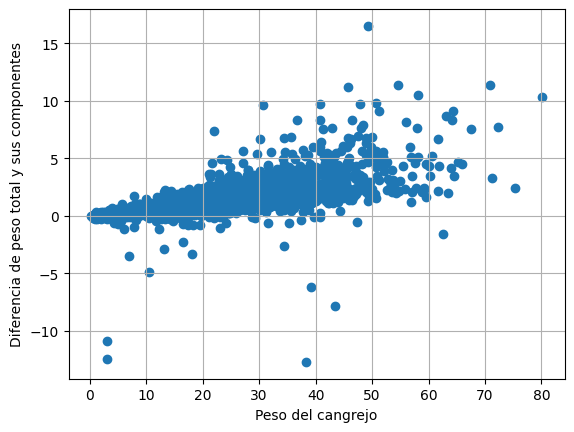

La cantidad de observaciones que tienen un peso total menor a la suma de sus pesos es 76


In [19]:
weight_diff = df['Weight'] - df['Shucked Weight']  - df['Shell Weight'] - df['Viscera Weight']
plt.scatter(x = df['Weight'], y=weight_diff)
plt.xlabel('Peso del cangrejo')
plt.ylabel('Diferencia de peso total y sus componentes')
plt.grid()
plt.show()
print('La cantidad de observaciones que tienen un peso total menor a la suma de sus pesos es', weight_diff.loc[weight_diff < 0].count())

Al revisar la diferencia entre la variable del peso total del cangrejo y los pesos de los componentes (caparazón, vísceras y peso sin caparazón) observamos que hay valores negativos por ejemplo, hay observaciones de cangrejos que tienen peso total menor a 5 pero al realizar la suma de los 3 valores, resulta alrededor de 15, dando una diferencia de alrededor -12.

Por este motivo, más adelante intentaremos eliminar estos datos que consideramos que son mediciones erróneas, puesto que solo añadirían ruido al modelo.

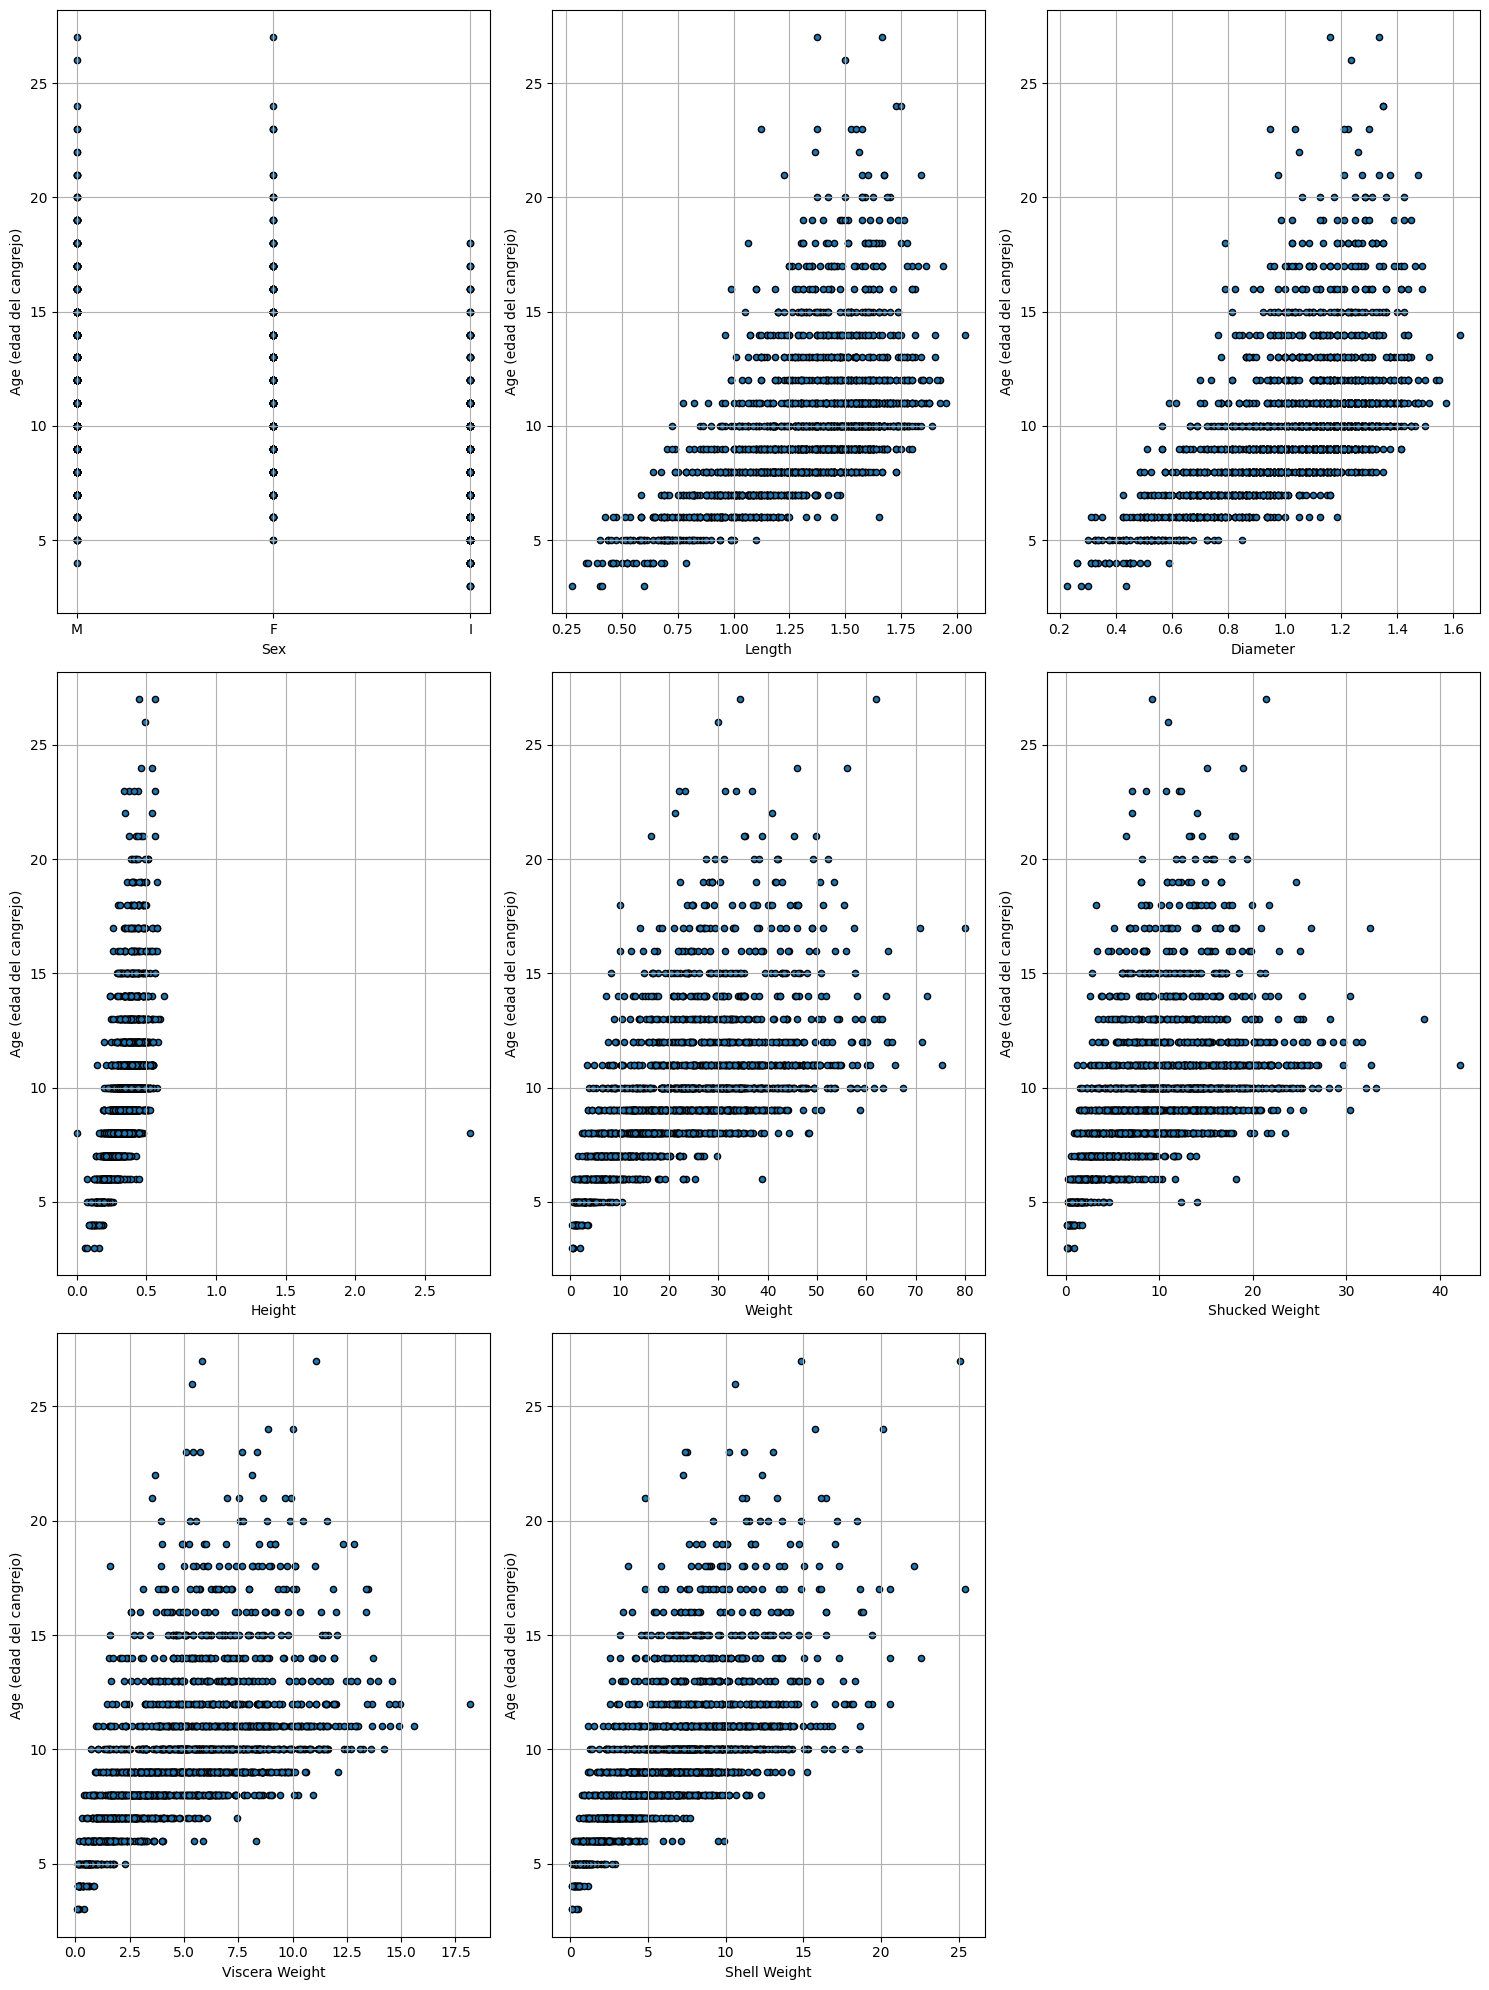

In [20]:

df.head()

# Nombres de las características para referencia
feature_names = ["Sex", "Length", "Diameter", "Height", "Weight", "Shucked Weight", "Viscera Weight", "Shell Weight"]

# Graficar cada característica contra la etiqueta
fig, axes = plt.subplots(3, 3, figsize=(15, 20))

for i, ax in enumerate(axes.ravel()):
    if i > 7:
        ax.axis('off')  # Desactivar ejes adicionales
        continue
    ax.scatter(df[feature_names[i]], df['Age'], edgecolor='k', s=20)
    ax.set_ylabel("Age (edad del cangrejo)")
    ax.set_xlabel(feature_names[i])
    ax.grid(True)

plt.tight_layout()
plt.show()

En este caso, podemos observar que las variables de longitud y diámetro tienen un comportamiento casi igual con respecto a la edad, lo mismo sucede con todas las variables que tienen que ver con el peso.

### Distribución de cada variable numérica

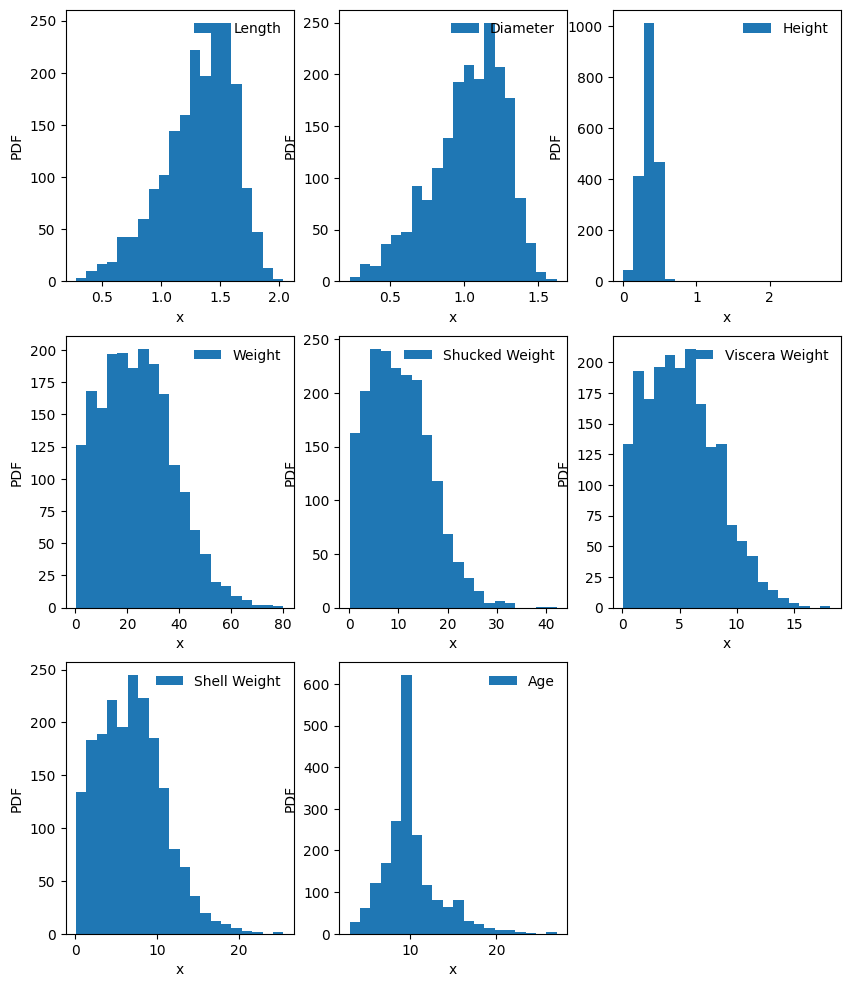

In [21]:
columnas = list(df_ns.columns)

fig, axes = plt.subplots(3, 3, figsize=(10, 12))
# Lazy counter so we can remove unwated axes
counter = 0
for i in range(3):
    for j in range(3):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(df_ns.columns):

            ax.hist(df_ns[df_ns.columns[counter]], bins=20, label='{}'.format(df_ns.columns[counter]))
            ax.set_xlabel('x')
            ax.set_ylabel('PDF')
            #ax.set_ylim([0, 5])
            leg = ax.legend(loc='upper right')
            leg.draw_frame(False)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1

plt.show()

### Correlación entre variables

<Axes: >

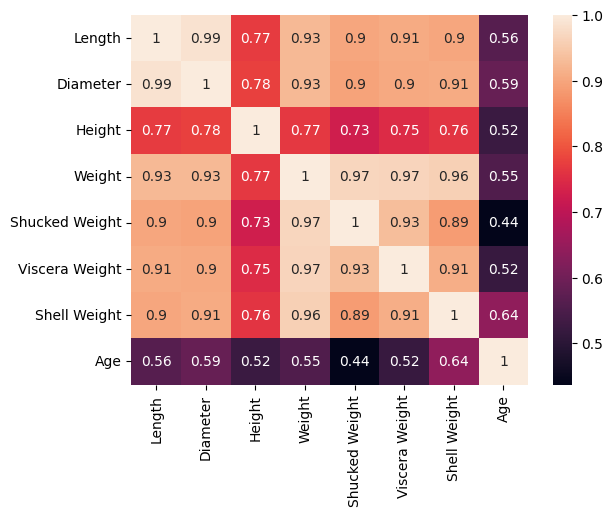

In [11]:
sns.heatmap(df_ns.corr(), annot=True)

Con la matriz de correlación, podemos ver que la variable a predecir, la edad, tiene una correlación muy baja con casi todas las demás variables en el dataset, aquella con la que tiene mayor correlación es con Shell weight (el peso del caparazón).

Adicionalmente, podemos observar que la variable Diameter y Length tienen una correlación de casi 1 y correlaciones por encima de 0.9 con todas las demás variables, por lo que quitaremos una de ellas, de la misma forma Weight tiene correlaciones muy altas con todos los demás pesos y con diametro y longitud, por ende probaremos 2 modelos, uno eliminándola y otro incluyéndola.

Cada uno de los modelos realizara un procedimiento de validación cruzada dividiendo el dataset en 10 folds. Para esto, utilizaremos la función de sklearn "cross_val_score", la cual recibe como parámetros el tipo de modelo a implementar, los datos predictores, los datos a predecir, el número de folds que se quieren crear y finalmente la métrica que se utilizará para la evaluación de los modelos. En este caso, dadoque la función cross_val_score solo permite calcular una métrica a la vez, debemos ejecutar esta función 2 veces para obtener las 2 métricas que deseamos (RMSE y MAE).

# Modelo con todos los cangrejos

In [23]:
X = df_ns.drop(columns=['Age'])
y = df_ns['Age']

for i in range(1,5):
    poly = PolynomialFeatures(i)
    X_pol = poly.fit_transform(X)
    col =poly.get_feature_names_out().tolist()
    #col.extend(xdum.columns)
    #xd_sup = np.column_stack([xnum, xdum])
    X_pol = pd.DataFrame(X_pol, columns=col)
    X_pol = X_pol.drop(['1'], axis=1)
    lm = LinearRegression()
    mse_score = cross_val_score(lm, X_pol, y, cv=10, scoring = 'neg_root_mean_squared_error')
    mae_score = cross_val_score(lm, X_pol, y, cv=10, scoring = 'neg_mean_absolute_error')
    print(f'Para un modelo de grado {i} se obtiene un RMSE promedio de: {np.mean(mse_score)} y una varianza de: {np.var(mse_score)}')
    print(f'Para un modelo de grado {i} se obtiene un MAE promedio de: {np.mean(mae_score)} y una varianza de: {np.var(mae_score)}')


Para un modelo de grado 1 se obtiene un RMSE promedio de: -2.275440493961395 y una varianza de: 0.07227575444393361
Para un modelo de grado 1 se obtiene un MAE promedio de: -1.6182904712352435 y una varianza de: 0.01080081201790995
Para un modelo de grado 2 se obtiene un RMSE promedio de: -3.1578400989892925 y una varianza de: 8.338358682531348
Para un modelo de grado 2 se obtiene un MAE promedio de: -1.6200081567900455 y una varianza de: 0.05864282132181105
Para un modelo de grado 3 se obtiene un RMSE promedio de: -38.14102483184006 y una varianza de: 11071.467510096283
Para un modelo de grado 3 se obtiene un MAE promedio de: -4.218331062948855 y una varianza de: 57.0486195700319
Para un modelo de grado 4 se obtiene un RMSE promedio de: -797.6246971246335 y una varianza de: 5563341.771142658
Para un modelo de grado 4 se obtiene un MAE promedio de: -59.20419767445428 y una varianza de: 28559.430069457583


De esto podemos concluir que el mejor modelo, basándonos en el RMSE y el MAE del conjunto de prueba es el de grado 1, de igual forma, vemos que los modelos de grado superior a 2 son inestables por lo que para este caso realizaremos un modelo de grado 1 con todos los datos y veremos su error promedio.

In [24]:
besto_lm = LinearRegression()
besto_lm.fit(X,y)

mse_test_scores = []
mae_test_scores = []
for i in range(1,100):
    samp = df_ni.sample(frac=0.1)
    samp_pred = besto_lm.predict(samp.drop(columns=['Age']))
    mse_test_scores.append(mean_squared_error(samp['Age'], samp_pred, squared=False))
    mae_test_scores.append(mean_absolute_error(samp['Age'], samp_pred))
print('La media de los errores cuadraticos medios es:', np.mean(mse_test_scores))
print('La varianza de los errores cuadraticos medios es:',np.std(mse_test_scores))
print('La media de los errores absolutos medios es:', np.mean(mae_test_scores))
print('La varianza de los errores absolutos medios es:',np.std(mae_test_scores))

La media de los errores cuadraticos medios es: 2.4303778769222393
La varianza de los errores cuadraticos medios es: 0.21642756140160221
La media de los errores absolutos medios es: 1.772921665471937
La varianza de los errores absolutos medios es: 0.14208064464082948


# Modelo con cangrejos machos y hembra únicamente

In [25]:
X = df_ni.drop(columns=['Age'])
y = df_ni['Age']

for i in range(1,5):
    poly = PolynomialFeatures(i)
    X_pol = poly.fit_transform(X)
    col =poly.get_feature_names_out().tolist()
    X_pol = pd.DataFrame(X_pol, columns=col)
    X_pol = X_pol.drop(['1'], axis=1)
    lm = LinearRegression()
    mse_score = cross_val_score(lm, X_pol, y, cv=10, scoring = 'neg_root_mean_squared_error')
    mae_score = cross_val_score(lm, X_pol, y, cv=10, scoring = 'neg_mean_absolute_error')
    print(f'Para un modelo de grado {i} se obtiene un RMSE promedio de: {np.mean(mse_score)} y una varianza de: {np.var(mse_score)}')
    print(f'Para un modelo de grado {i} se obtiene un MAE promedio de: {np.mean(mae_score)} y una varianza de: {np.var(mae_score)}')


Para un modelo de grado 1 se obtiene un RMSE promedio de: -2.4694501794104964 y una varianza de: 0.08539309259619848
Para un modelo de grado 1 se obtiene un MAE promedio de: -1.7900873479449366 y una varianza de: 0.024633264275584286
Para un modelo de grado 2 se obtiene un RMSE promedio de: -3.448024226792959 y una varianza de: 9.596597938557943
Para un modelo de grado 2 se obtiene un MAE promedio de: -1.8417269597265178 y una varianza de: 0.11469753336310631
Para un modelo de grado 3 se obtiene un RMSE promedio de: -160.97680188743038 y una varianza de: 225196.70564471983
Para un modelo de grado 3 se obtiene un MAE promedio de: -15.648117243114871 y una varianza de: 1701.7328119850233
Para un modelo de grado 4 se obtiene un RMSE promedio de: -377.62704028181594 y una varianza de: 1222646.9697061118
Para un modelo de grado 4 se obtiene un MAE promedio de: -35.38731329501688 y una varianza de: 9281.792509250161


Para este caso, el dejar de considerar cangrejos de género indeterminado no tiene mucho impacto sobre el resultado del modelo, con lo que podemos ver que los valores de error y sus varianzas se comportan de la misma forma que antes.

In [27]:
besto_lm = LinearRegression()
besto_lm.fit(X,y)

mse_test_scores = []
mae_test_scores = []
for i in range(1,100):
    samp = df_ni.sample(frac=0.1)
    samp_pred = besto_lm.predict(samp.drop(columns=['Age']))
    mse_test_scores.append(mean_squared_error(samp['Age'], samp_pred, squared=False))
    mae_test_scores.append(mean_absolute_error(samp['Age'], samp_pred))
print('La media de los errores cuadraticos medios es:', np.mean(mse_test_scores))
print('La varianza de los errores cuadraticos medios es:',np.std(mse_test_scores))
print('La media de los errores absolutos medios es:', np.mean(mae_test_scores))
print('La varianza de los errores absolutos medios es:',np.std(mae_test_scores))

La media de los errores cuadraticos medios es: 2.4315472146068298
La varianza de los errores cuadraticos medios es: 0.0
La media de los errores absolutos medios es: 1.857697538745739
La varianza de los errores absolutos medios es: 0.0


Lo mismo sucede con los valores de error con el modelo completo, por lo que este cambio no es significativo

# Modelo con todos los cangrejos sin longitud

In [ ]:
X = df_ns.drop(columns=['Age', 'Length'])
y = df_ns['Age']

scores = []
for i in range(1,5):
    poly = PolynomialFeatures(i)
    X_pol = poly.fit_transform(X)
    col =poly.get_feature_names_out().tolist()
    X_pol = pd.DataFrame(X_pol, columns=col)
    X_pol = X_pol.drop(['1'], axis=1)
    lm = LinearRegression()
    mse_score = cross_val_score(lm, X_pol, y, cv=10, scoring = 'neg_root_mean_squared_error')
    mae_score = cross_val_score(lm, X_pol, y, cv=10, scoring = 'neg_mean_absolute_error')
    print(f'Para un modelo de grado {i} se obtiene un RMSE promedio de: {np.mean(mse_score)} y una varianza de: {np.var(mse_score)}')
    print(f'Para un modelo de grado {i} se obtiene un MAE promedio de: {np.mean(mae_score)} y una varianza de: {np.var(mae_score)}')


Para un modelo de grado 1 se obtiene un RMSE promedio de: -2.2741016414993878 y una varianza de: 0.0699399284260697
Para un modelo de grado 1 se obtiene un MAE promedio de: -1.6180783058688544 y una varianza de: 0.01077102077720974
Para un modelo de grado 2 se obtiene un RMSE promedio de: -3.0382763289293173 y una varianza de: 6.922880969837119
Para un modelo de grado 2 se obtiene un MAE promedio de: -1.6072870105003667 y una varianza de: 0.050055132791886524
Para un modelo de grado 3 se obtiene un RMSE promedio de: -49.941134235025395 y una varianza de: 20452.865664980818
Para un modelo de grado 3 se obtiene un MAE promedio de: -5.012784219844548 y una varianza de: 105.01830908350428
Para un modelo de grado 4 se obtiene un RMSE promedio de: -1683.4373592867105 y una varianza de: 25369973.14617309
Para un modelo de grado 4 se obtiene un MAE promedio de: -122.31572099089351 y una varianza de: 130188.86872272621


Al igual que en el caso anterior, podemos ver que el RMSE crece a medida que aumenta el grado del polinomio y la varianza a partir del grado 2 es muy alta, por lo que nuevamente optamos por el de grado 1, adicionalmente, notamos una mejora muy pequeña al eliminar esta variable

In [ ]:
besto_lm = LinearRegression()
besto_lm.fit(X,y)

mse_test_scores = []
mae_test_scores = []
for i in range(1,100):
    samp = df_ni.sample(frac=0.1)
    samp_pred = besto_lm.predict(samp.drop(columns=['Age', 'Length']))
    mse_test_scores.append(mean_squared_error(samp['Age'], samp_pred, squared=False))
    mae_test_scores.append(mean_absolute_error(samp['Age'], samp_pred))

print('La media de los errores cuadraticos medios es:', np.mean(mse_test_scores))
print('La varianza de los errores cuadraticos medios es:',np.std(mse_test_scores))
print('La media de los errores absolutos medios es:', np.mean(mae_test_scores))
print('La varianza de los errores absolutos medios es:',np.std(mae_test_scores))

La media de los errores cuadraticos medios es: 2.4329935838832646
La varianza de los errores cuadraticos medios es: 0.2183409156913373
La media de los errores absolutos medios es: 1.7799005334080098
La varianza de los errores absolutos medios es: 0.13166611600114903


Podemos ver que el comportamiento respecto al modelo anterior es casi insignificante, por lo que nuevamente no hay mucha influencia al eliminar esta variable

# Modelo con todos los cangrejos sin diametro

In [ ]:
X = df_ns.drop(columns=['Age', 'Diameter'])
y = df_ns['Age']

scores = []
for i in range(1,5):
    poly = PolynomialFeatures(i)
    X_pol = poly.fit_transform(X)
    col =poly.get_feature_names_out().tolist()
    X_pol = pd.DataFrame(X_pol, columns=col)
    X_pol = X_pol.drop(['1'], axis=1)
    lm = LinearRegression()
    mse_score = cross_val_score(lm, X_pol, y, cv=10, scoring = 'neg_root_mean_squared_error')
    mae_score = cross_val_score(lm, X_pol, y, cv=10, scoring = 'neg_mean_absolute_error')
    print(f'Para un modelo de grado {i} se obtiene un RMSE promedio de: {np.mean(mse_score)} y una varianza de: {np.var(mse_score)}')
    print(f'Para un modelo de grado {i} se obtiene un MAE promedio de: {np.mean(mae_score)} y una varianza de: {np.var(mae_score)}')


Para un modelo de grado 1 se obtiene un RMSE promedio de: -2.3009974784787985 y una varianza de: 0.08380483325542379
Para un modelo de grado 1 se obtiene un MAE promedio de: -1.630662992106224 y una varianza de: 0.010904268580965899
Para un modelo de grado 2 se obtiene un RMSE promedio de: -3.118936008081818 y una varianza de: 8.289184168968363
Para un modelo de grado 2 se obtiene un MAE promedio de: -1.6048418621465945 y una varianza de: 0.05661095811228274
Para un modelo de grado 3 se obtiene un RMSE promedio de: -35.40347289467079 y una varianza de: 9858.451304778053
Para un modelo de grado 3 se obtiene un MAE promedio de: -3.9714360669830113 y una varianza de: 50.555533556821054
Para un modelo de grado 4 se obtiene un RMSE promedio de: -1649.0876451700199 y una varianza de: 24330411.912402734
Para un modelo de grado 4 se obtiene un MAE promedio de: -119.8240143044023 y una varianza de: 124799.02961205368


Nuevamente podemos ver que no hay muchas diferencias, pues la variable diametro tiene prácticamente el mismo comportamiento de la variable Longitud.

In [ ]:
besto_lm = LinearRegression()
besto_lm.fit(X,y)

mse_test_scores = []
mae_test_scores = []
for i in range(1,100):
    samp = df_ni.sample(frac=0.1)
    samp_pred = besto_lm.predict(samp.drop(columns=['Age', 'Diameter']))
    mse_test_scores.append(mean_squared_error(samp['Age'], samp_pred, squared=False))
    mae_test_scores.append(mean_absolute_error(samp['Age'], samp_pred))

print('La media de los errores cuadraticos medios es:', np.mean(mse_test_scores))
print('La varianza de los errores cuadraticos medios es:',np.std(mse_test_scores))
print('La media de los errores absolutos medios es:', np.mean(mae_test_scores))
print('La varianza de los errores absolutos medios es:',np.std(mae_test_scores))

La media de los errores cuadraticos medios es: 2.453055554176249
La varianza de los errores cuadraticos medios es: 0.21010622468101978
La media de los errores absolutos medios es: 1.779039046598135
La varianza de los errores absolutos medios es: 0.13081659843941676


Con lo cual es de esperar que estos resultados sean prácticamente iguales a los anteriores.

# Modelo con todos los cangrejos sin diametro eliminando pesos anomalos

In [ ]:
X = df_ns.drop(columns=['Age', 'Diameter'])
X = X[weight_diff >= 0]
y = df_ns['Age']
y = y[weight_diff >= 0]

scores = []
for i in range(1,5):
    poly = PolynomialFeatures(i)
    X_pol = poly.fit_transform(X)
    col =poly.get_feature_names_out().tolist()
    X_pol = pd.DataFrame(X_pol, columns=col)
    X_pol = X_pol.drop(['1'], axis=1)
    lm = LinearRegression()
    mse_score = cross_val_score(lm, X_pol, y, cv=10, scoring = 'neg_root_mean_squared_error')
    mae_score = cross_val_score(lm, X_pol, y, cv=10, scoring = 'neg_mean_absolute_error')
    print(f'Para un modelo de grado {i} se obtiene un RMSE promedio de: {np.mean(mse_score)} y una varianza de: {np.var(mse_score)}')
    print(f'Para un modelo de grado {i} se obtiene un MAE promedio de: {np.mean(mae_score)} y una varianza de: {np.var(mae_score)}')


Para un modelo de grado 1 se obtiene un RMSE promedio de: -2.3036487104472156 y una varianza de: 0.08449331523053472
Para un modelo de grado 1 se obtiene un MAE promedio de: -1.6337143726644698 y una varianza de: 0.011484356749165614
Para un modelo de grado 2 se obtiene un RMSE promedio de: -3.3219223588628295 y una varianza de: 11.803542692705543
Para un modelo de grado 2 se obtiene un MAE promedio de: -1.6371808922708062 y una varianza de: 0.07341685149427843
Para un modelo de grado 3 se obtiene un RMSE promedio de: -34.77658752452885 y una varianza de: 9461.694999058023
Para un modelo de grado 3 se obtiene un MAE promedio de: -3.9896548179272933 y una varianza de: 50.45832066758407
Para un modelo de grado 4 se obtiene un RMSE promedio de: -1648.7428125067133 y una varianza de: 24304854.217590265
Para un modelo de grado 4 se obtiene un MAE promedio de: -122.33791769968063 y una varianza de: 130001.52366683059


Al eliminar los pesos anómalos y la variable diámetro, podemos ver que no hay mucha diferencia y de hecho las varianzas tienden a ser ligeramente superiores al modelo sin pesos anómalos.

In [ ]:
besto_lm = LinearRegression()
besto_lm.fit(X,y)

mse_test_scores = []
mae_test_scores = []
for i in range(1,100):
    samp = df_ni.sample(frac=0.1)
    samp_pred = besto_lm.predict(samp.drop(columns=['Age', 'Diameter']))
    mse_test_scores.append(mean_squared_error(samp['Age'], samp_pred, squared=False))
    mae_test_scores.append(mean_absolute_error(samp['Age'], samp_pred))

print('La media de los errores cuadraticos medios es:', np.mean(mse_test_scores))
print('La varianza de los errores cuadraticos medios es:',np.std(mse_test_scores))
print('La media de los errores absolutos medios es:', np.mean(mae_test_scores))
print('La varianza de los errores absolutos medios es:',np.std(mae_test_scores))

La media de los errores cuadraticos medios es: 2.4137806820936034
La varianza de los errores cuadraticos medios es: 0.21062094717923122
La media de los errores absolutos medios es: 1.7653011014656985
La varianza de los errores absolutos medios es: 0.13621471044080918


De igual forma, los resultados de todo junto son iguales a los anteriores

# Modelo con todos los cangrejos sin diametro eliminando pesos anomalos y altura anomala

In [ ]:
df_ns_hc = df_ns[df_ns['Height'] < 2]
X = df_ns_hc.drop(columns=['Age', 'Diameter'])
X = X[weight_diff >= 0]
y = df_ns_hc['Age']
y = y[weight_diff >= 0]

scores = []
for i in range(1,5):
    poly = PolynomialFeatures(i)
    X_pol = poly.fit_transform(X)
    col =poly.get_feature_names_out().tolist()
    X_pol = pd.DataFrame(X_pol, columns=col)
    X_pol = X_pol.drop(['1'], axis=1)
    lm = LinearRegression()
    mse_score = cross_val_score(lm, X_pol, y, cv=10, scoring = 'neg_root_mean_squared_error')
    mae_score = cross_val_score(lm, X_pol, y, cv=10, scoring = 'neg_mean_absolute_error')
    print(f'Para un modelo de grado {i} se obtiene un RMSE promedio de: {np.mean(mse_score)} y una varianza de: {np.var(mse_score)}')
    print(f'Para un modelo de grado {i} se obtiene un MAE promedio de: {np.mean(mae_score)} y una varianza de: {np.var(mae_score)}')

    print("")

Para un modelo de grado 1 se obtiene un RMSE promedio de: -2.2057561458922073 y una varianza de: 0.04124039521090729
Para un modelo de grado 1 se obtiene un MAE promedio de: -1.6076646837082085 y una varianza de: 0.012326409448929241

/tmp/ipykernel_175/4013520144.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X = X[weight_diff >= 0]
Para un modelo de grado 2 se obtiene un RMSE promedio de: -2.1624993231567182 y una varianza de: 0.04976266066406232
Para un modelo de grado 2 se obtiene un MAE promedio de: -1.539192795337898 y una varianza de: 0.012514004940316986

Para un modelo de grado 3 se obtiene un RMSE promedio de: -2.317990806855275 y una varianza de: 0.11348567322055245
Para un modelo de grado 3 se obtiene un MAE promedio de: -1.6038765234611478 y una varianza de: 0.018847843023944787

Para un modelo de grado 4 se obtiene un RMSE promedio de: -5.176513719604351 y una varianza de: 9.432539527187574
Para un modelo de grado 4 se obtiene un MAE p

El eliminar el dato anómalo en la altura tuvo un efecto muy significativo, reduciendo significativamente tanto el error como la varianza en el error de los modelos de grado 2 y grado 3, haciendo que el modelo de grado 2 sea ligeramente menor al de grado 1.

In [ ]:
poly = PolynomialFeatures(2)
X_pol = poly.fit_transform(X)
col =poly.get_feature_names_out().tolist()
X_pol = pd.DataFrame(X_pol, columns=col)
X_pol = X_pol.drop(['1'], axis=1)
besto_lm = LinearRegression()
besto_lm.fit(X_pol,y)

mse_test_scores = []
mae_test_scores = []
for i in range(1,100):
    samp = df_ni.sample(frac=0.1)
    samp_pol = poly.fit_transform(samp.drop(['Age', 'Diameter'], axis=1))
    col =poly.get_feature_names_out().tolist()
    samp_pol = pd.DataFrame(samp_pol, columns=col)
    samp_pol = samp_pol.drop(['1'], axis=1)
    samp_pred = besto_lm.predict(samp_pol)
    mse_test_scores.append(mean_squared_error(samp['Age'], samp_pred, squared=False))
    mae_test_scores.append(mean_absolute_error(samp['Age'], samp_pred))

print('La media de los errores cuadraticos medios es:', np.mean(mse_test_scores))
print('La varianza de los errores cuadraticos medios es:',np.std(mse_test_scores))
print('La media de los errores absolutos medios es:', np.mean(mae_test_scores))
print('La varianza de los errores absolutos medios es:',np.std(mae_test_scores))

La media de los errores cuadraticos medios es: 3.412001087793217
La varianza de los errores cuadraticos medios es: 3.70466542801646
La media de los errores absolutos medios es: 1.7972623684102726
La varianza de los errores absolutos medios es: 0.3850698847748922


De esta forma, logramos conseguir un modelo de grado 2 que será el mejor, veamos sus parámetros

# Conclusiones

De esta forma, el mejor modelo sale al realizar una regresión polinomial de grado 2 considerando cangrejos sin sexo identificado y con las variables:

- Length

- Height

- Weight

- Shucked Weight

- Viscera Weight

- Shell Weight

Al eliminar los datos anómalos de altura y peso, y sus coeficientes son:

In [ ]:
print('Los coeficientes para esos datos de entrada serán: ',besto_lm.coef_)

Los coeficientes para esos datos de entrada serán:  [ 8.74828693e+00 -6.80657456e+00  5.53315914e-01 -1.96536300e+00
  7.81866926e-01  1.26270836e+00 -5.53340226e+00  6.55374069e+00
 -2.17350417e-01  1.20313010e+00 -6.32521254e-01 -2.45177583e-01
  2.81689685e+01  1.32723668e+00 -1.98535298e+00 -2.04317338e+00
 -2.38784026e+00 -2.90134984e-02  2.10086611e-02  1.30441857e-01
  4.35000172e-02  2.26506363e-02 -1.03463278e-01 -5.35034199e-02
 -1.02674319e-01 -8.22236910e-02  1.21134543e-02]


Adicionalmente, su intercepto es

In [ ]:
print('El intercepto de este modelo es: ',besto_lm.intercept_)

El intercepto de este modelo es:  1.320339685582658


Y para entrenarlo usamos el siguiente proceso:

In [39]:
df_ns_hc = df_ns[df_ns['Height'] < 2]
X = df_ns_hc.drop(columns=['Age', 'Diameter'])
X = X[weight_diff >= 0]
y = df_ns_hc['Age']
y = y[weight_diff >= 0]

poly = PolynomialFeatures(2)
X_pol = poly.fit_transform(X)
col =poly.get_feature_names_out().tolist()
X_pol = pd.DataFrame(X_pol, columns=col)
X_pol = X_pol.drop(['1'], axis=1)
besto_lm = LinearRegression()
besto_lm.fit(X_pol,y)

besto_lm.coef_

<ipython-input-39-3a76a02e4468>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X = X[weight_diff >= 0]


array([ 8.74828693e+00, -6.80657456e+00,  5.53315914e-01, -1.96536300e+00,
        7.81866926e-01,  1.26270836e+00, -5.53340226e+00,  6.55374069e+00,
       -2.17350417e-01,  1.20313010e+00, -6.32521254e-01, -2.45177583e-01,
        2.81689685e+01,  1.32723668e+00, -1.98535298e+00, -2.04317338e+00,
       -2.38784026e+00, -2.90134984e-02,  2.10086611e-02,  1.30441857e-01,
        4.35000172e-02,  2.26506363e-02, -1.03463278e-01, -5.35034199e-02,
       -1.02674319e-01, -8.22236910e-02,  1.21134543e-02])

In [70]:
#Las pruebas del profesor

crab_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2023-2S-AAD-1Corte/datos_validar/CrabAgePrediction_Subset1.csv').dropna()
crab_data_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2023-2S-AAD-1Corte/datos_validar/CrabAgePrediction_Subset2.csv').dropna()


crab_data = crab_data[crab_data['Height'] < 2]
crab_data_test = crab_data_test[crab_data_test['Height'] < 2]

X_train_val = crab_data.drop(columns=['Age','Sex','Diameter'])
y_train_val = crab_data['Age']
X_test = crab_data_test.drop(columns=['Age','Sex','Diameter'])
y_test = crab_data_test['Age']


selected_features = ['Length',  'Height',  'Weight',  'Shucked Weight',  'Viscera Weight',  'Shell Weight']

#X_train_val = X_train_val[selected_features]
#X_test = X_test[selected_features]


weight_diff = crab_data['Weight'] - crab_data['Shucked Weight']  - crab_data['Shell Weight'] - crab_data['Viscera Weight']
X = X_train_val[weight_diff >= 0]
y = y_train_val[weight_diff >= 0]

#Seleccion de polinomio
degree=2

# Transformar las características a polinomio de grado 2
poly = PolynomialFeatures(degree=degree)
X_train_val_poly = poly.fit_transform(X)
X_test_poly = poly.transform(X_test)

# Entrenar el modelo en el conjunto combinado de entrenamiento y validación
model = LinearRegression()
model.fit(X_train_val_poly, y)


# Hacer predicciones en el conjunto de prueba
y_test_pred = model.predict(X_test_poly)

# Calcular RMSE y MAE
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
mae_test = mean_absolute_error(y_test, y_test_pred)


print(f'RMSE en el conjunto de prueba: {rmse_test}')
print(f'MAE en el conjunto de prueba: {mae_test}'),
model.coef_


RMSE en el conjunto de prueba: 2.167772505497704
MAE en el conjunto de prueba: 1.5319921604467739


array([ 3.53175853e-12,  7.57726584e+00, -2.47089031e+00,  5.36026348e-01,
       -1.90495351e+00,  7.94167035e-01,  1.22326159e+00, -5.86849541e+00,
        1.54723841e+01, -1.88653174e-01,  1.18347958e+00, -7.57564475e-01,
       -3.83287283e-01, -1.44038722e+00,  1.32290069e+00, -2.20588092e+00,
       -1.60159506e+00, -1.67803184e+00, -2.94903121e-02,  2.01585982e-02,
        1.32767242e-01,  4.42222180e-02,  2.37327240e-02, -1.02319383e-01,
       -4.88517597e-02, -1.02957390e-01, -9.26053971e-02,  8.86492854e-03])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4d95ea4b-1989-49a0-85a4-49dea6db2700' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>